<b>AML2019</b>

<h3>Challenge 1</h3>
<h4>RAJPUT Rehan Razzaque, 
    ARRIVAT Marie</h4>
<h1>House Pricing Prediction</h1>
<hr style="height:2px;border:none;color:#333;background-color:#333;"/>
<i>22<sup>th</sup> March 2019</i>

The first AML challenge for this year is adapted from the well-known '<i>Zillow's Home Value Prediction</i>' competition on Kaggle.
In particular, given a dataset containing descriptions of homes on the US property market, your task is to make predictions on the selling price of as-yet unlisted properties. 
Developing a model which accurately fits the available training data while also generalising to unseen data-points is a multi-faceted challenge that involves a mixture of data exploration, pre-processing, model selection, and performance evaluation.

# Overview
<hr style="height:1px;border:none;color:#333;background-color:#333;" />    

Beyond simply producing a well-performing model for making predictions, in this challenge we would like you to start developing your skills as a machine learning scientist.
In this regard, your notebook should be structured in such a way as to explore the five following tasks that are expected to be carried out whenever undertaking such a project.
The description below each aspect should serve as a guide for your work, but you are strongly encouraged to also explore alternative options and directions. 
Thinking outside the box will always be rewarded in these challenges.

<div class="">
    <h3>Data Exploration and Data Pre-processing</h3>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import sklearn.metrics as met
import sklearn.preprocessing as preprocess
import sklearn.decomposition as decom
import sklearn.pipeline as pl
import sklearn.ensemble as ensem
import sklearn.tree as tree
import sklearn.svm as svm
import tensorflow as tf
import seaborn as sn
import warnings

In [2]:
import warnings

warnings.simplefilter("ignore")

<p>At many points, we got DataConversionWarning, we do this to suppress those warnings.</p>

In [3]:
initial_data = pd.read_csv('./challenge_data/train.csv')

In [4]:
initial_test_data = pd.read_csv('./challenge_data/test.csv')

<b> NaN values : <b/>

In [5]:
for column in initial_test_data.columns:
    if(initial_test_data[column].isna().sum() >= 1):
        print(column)

LotFrontage
Alley
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature


In [6]:
for column in initial_data.columns:
    if(initial_data[column].isna().sum() >= 1):
        print(column)

LotFrontage
Alley
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature


<p> All those columns contain some NaN values. We deceided to look upon them because the non-NaN values might be consistent, so removing the columns wouldn't be a good idea.
    We observed that for all of them, we could replace the NaN by a certain value so it wouldn't influence the price, whereas the non-Nan values would keep their influences.</p>
    <p> One thing to note here, is that in the test set, the feature Electrical contains 'nan' values, whereas that is not the case in the training set</p>

In [7]:
train_data_df = initial_data

In [8]:
test_data_df = initial_test_data

In [9]:
LFMean = train_data_df['LotFrontage'].mean()
train_data_df['LotFrontage']= train_data_df['LotFrontage'].fillna(LFMean)

In [10]:
LFMean2 = test_data_df['LotFrontage'].mean()
test_data_df['LotFrontage']= test_data_df['LotFrontage'].fillna(LFMean2)

<p> For LFMean, we look at the size of the lot frontage. As we don't know about the size, we decide that we could put the mean of all other LotFrontages here to not lose data contained in other columns of this record.</p>

In [11]:
train_data_df['Alley'] = train_data_df['Alley'].fillna('NA')

In [12]:
test_data_df['Alley'] = test_data_df['Alley'].fillna('NA')

In [13]:
train_data_df['MasVnrType'] = train_data_df['MasVnrType'].fillna('None')

In [14]:
test_data_df['MasVnrType'] = test_data_df['MasVnrType'].fillna('None')

<p> Here we consider that a Nan value is equivalent to having nothing. So we replace the Nan by 'NA' or 'None'. </p>

In [15]:
test_data_df['Electrical'] = test_data_df['Electrical'].fillna('SBrkr')

<p> Here we consider that a Nan value is equivalent to having the most common value (i.e "SBrkr")* so it doesn't have an influence. </p>
<p>*See the feature bar plots later on in the notebook</p>

In [16]:
train_data_df['MasVnrArea'] = train_data_df['MasVnrArea'].fillna(0.0)

In [17]:
test_data_df['MasVnrArea'] = test_data_df['MasVnrArea'].fillna(0.0)

<p> Here we consider that no MasVnr corresponds to one with a null area. </p>

In [18]:
train_data_df[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']] = train_data_df[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']].fillna('NA')

In [19]:
test_data_df[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']] = test_data_df[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']].fillna('NA')

In [20]:
train_data_df['FireplaceQu'] = train_data_df['FireplaceQu'].fillna('NA')

In [21]:
test_data_df['FireplaceQu'] = test_data_df['FireplaceQu'].fillna('NA')

In [22]:
train_data_df[['GarageType','GarageFinish','GarageQual','GarageCond']] = train_data_df[['GarageType','GarageFinish','GarageQual','GarageCond']].fillna('NA')

In [23]:
test_data_df[['GarageType','GarageFinish','GarageQual','GarageCond']] = test_data_df[['GarageType','GarageFinish','GarageQual','GarageCond']].fillna('NA')

<p> Here again we consider that a Nan value is equivalent to having nothing. So we replace the Nan by 'NA'. </p>

In [24]:
GYBlt = train_data_df['GarageYrBlt'].mean()
train_data_df['GarageYrBlt']= train_data_df['GarageYrBlt'].fillna(GYBlt)

In [25]:
GYBlt2 = test_data_df['GarageYrBlt'].mean()
test_data_df['GarageYrBlt']= test_data_df['GarageYrBlt'].fillna(GYBlt2)

<p> For GarageYrBlt, we look at year the garage was built. If there is no garage, it has never been built. So, we replace the Nan by the mean year of garage building. </p>

In [26]:
train_data_df[['PoolQC','Fence','MiscFeature']] = train_data_df[['PoolQC','Fence','MiscFeature']].fillna('NA')

In [27]:
test_data_df[['PoolQC','Fence','MiscFeature']] = test_data_df[['PoolQC','Fence','MiscFeature']].fillna('NA')

In [28]:
numeric_columns = train_data_df._get_numeric_data().columns
categorial_columns = list( set(train_data_df.columns) - set(numeric_columns))

<p> Here again we consider that a Nan value is equivalent to having nothing. So we replace the Nan by 'NA'. </p>

<b> Making 'Id' the index : <b/>

In [29]:
train_data_df.set_index(train_data_df['Id'])
train_data_df = train_data_df.drop(['Id'],axis=1)

In [30]:
test_data_df.set_index(test_data_df['Id'])
test_data_df = test_data_df.drop(['Id'],axis=1)

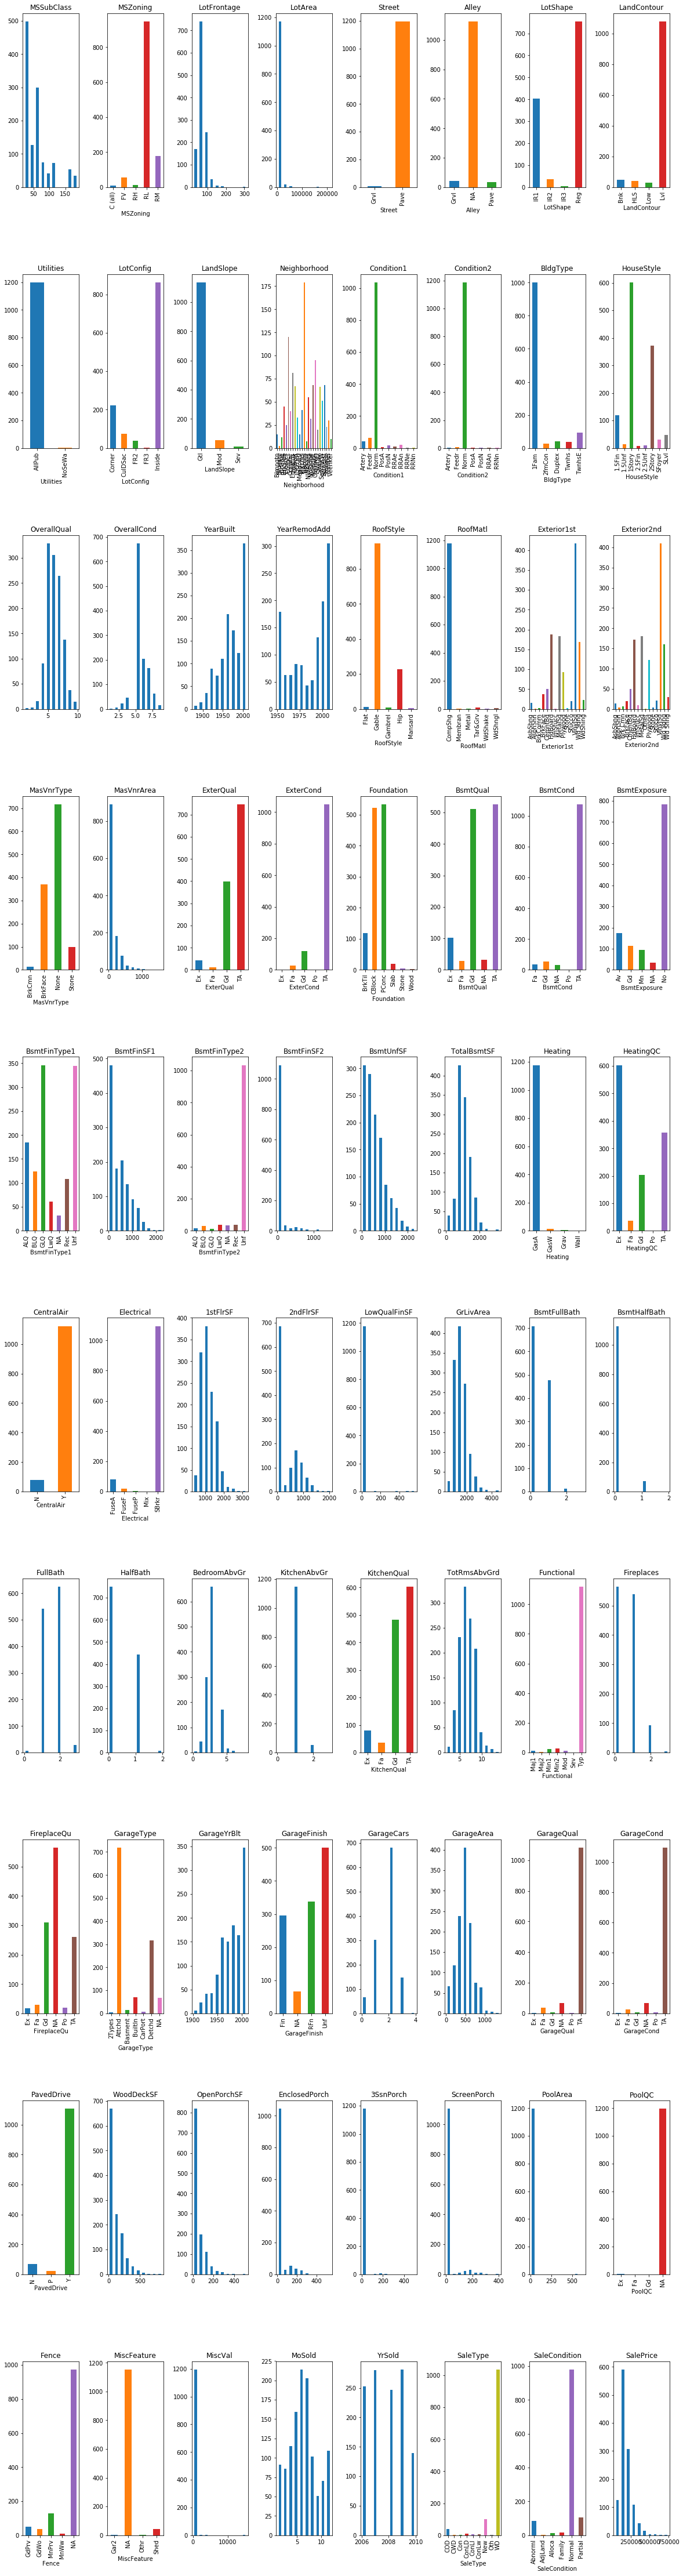

In [31]:
n = len(train_data_df.columns)
n1 = n//8
fig, axs = plt.subplots(n1, 8,figsize=(20,80))
fig.subplots_adjust(wspace = 0.5, hspace = 0.5)
k = 0
for i in range(n1):
    for j in range(8):
        # plt.title('Distribution of housing prices')
        # plt.xlabel('Price')
        # plt.ylabel('Number of houses')
        if( train_data_df.columns[k] in categorial_columns):
            train_data_df.groupby(train_data_df.columns[k]).size().plot(kind='bar',ax=axs[i][j])
        else:
            axs[i][j].hist(train_data_df[train_data_df.columns[k]], label = train_data_df.columns[i], rwidth = 0.5 )
        axs[i][j].set_title(train_data_df.columns[k])
        k = k+1
plt.show()

<p>Looking at the graph we see that there are multiple features (like Utilities, Condition2, RoofMatl, Heating etc.) that have same value 99% of the times. For us, such features are useless, since they tend not to change with the SalePrice and vice-versa.</p>

<p> Doing one hot encoding of categorial columns </p>

In [32]:
onehot_categorical = [] ## This variable will keep the names of all useful categorical columns

In [33]:
for column in categorial_columns:
    encoded = pd.get_dummies(train_data_df[column],prefix=column+"_")
    train_data_df.drop([column],axis=1,inplace=True)
    train_data_df[encoded.columns] = encoded
    
    onehot_categorical = list(set(onehot_categorical).union(set(encoded.columns)))
    
    test_encoded = pd.get_dummies(test_data_df[column],prefix=column+"_")
    test_data_df.drop([column],axis=1,inplace=True)
    test_data_df[test_encoded.columns] = test_encoded
    
    onehot_categorical = list(set(onehot_categorical).union(set(test_encoded.columns)))

<p>There are some categorical features that are contained ONLY in test data and some that are ONLY contained in training data. Our approach is just to keep the intersection of these categorical features in both of them.</p>

In [34]:
for col in set(train_data_df.columns).difference(set(test_data_df.columns)):
    if(col!= "SalePrice"):
        train_data_df.drop([col],axis=1,inplace=True)

for col in set(test_data_df.columns).difference(set(train_data_df.columns)):
    test_data_df.drop([col],axis=1,inplace=True)

In [35]:
onehot_categorical = list(set(onehot_categorical).intersection(set(test_data_df.columns)))

In [36]:
train_data_df.shape,test_data_df.shape

((1200, 254), (260, 253))

<b> House pricing (before removing the outliers) : <b/>

In [37]:
train_x = train_data_df.drop(['SalePrice'],axis=1)
train_y = train_data_df['SalePrice']

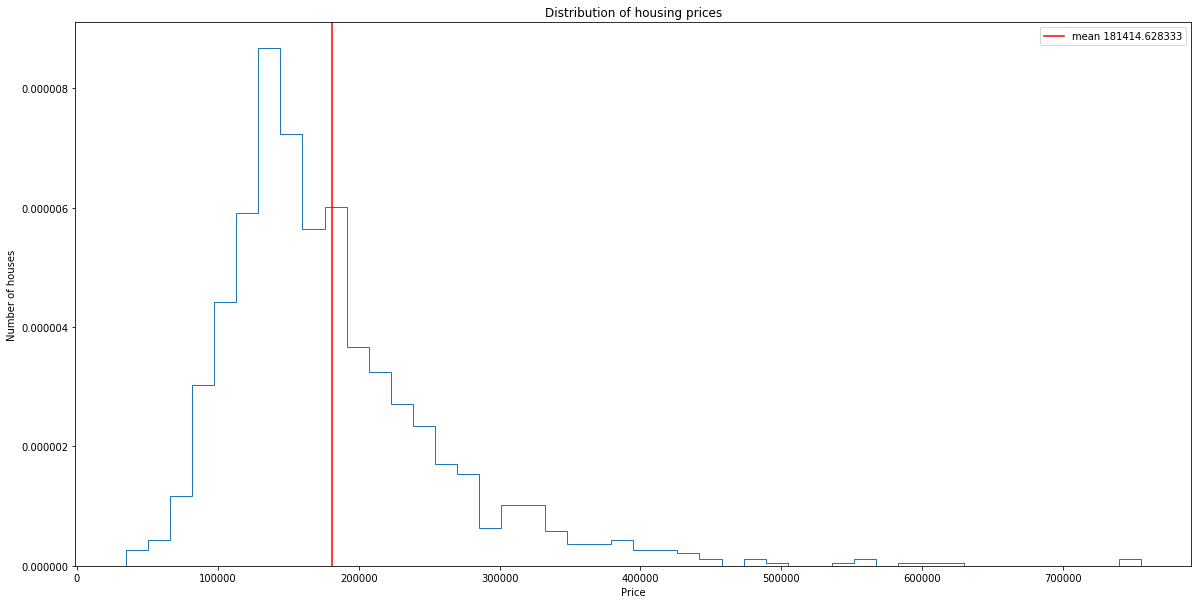

In [38]:
## Data exploration part
## distribution of the house prices
plt.figure(figsize=(20,10))
plt.title('Distribution of housing prices')
plt.xlabel('Price')
plt.ylabel('Number of houses')
plt.hist(train_y,bins='auto',histtype='step',density=True)
plt.axvline(train_y.mean(),label='mean %f'%(train_y.mean()),color='r')
plt.legend()
plt.show()

<p> Here we have an overall view of the house pricing.
We notice that average price of a house is approximately 180,000 dollars. However, we also see that there are a few houses that cost more than 500,000 dollars. Next, we're going to remove the outliers in the dataset using IsolationForest.  <p/>

<b> Removing outliers : <b/>

In [39]:
IF = ensem.IsolationForest(max_samples=1000).fit(train_data_df).predict(train_data_df)

train_data_df = train_data_df[IF==1]
train_data_df.reset_index(drop=True,inplace=True)

In [40]:
train_data_df.shape

(1080, 254)

<p> We see that our method has removed 120 records </p>

<b> House pricing (after removing the outliers) : <b/>

In [41]:
train_x = train_data_df.drop(['SalePrice'],axis=1)
train_y = train_data_df['SalePrice']

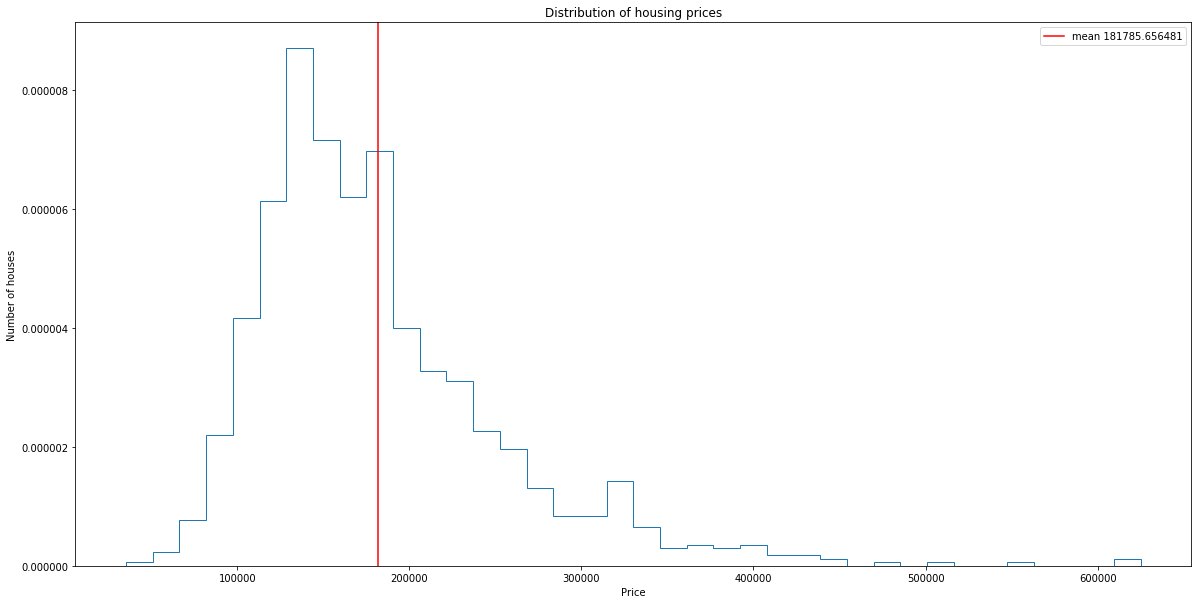

In [42]:
## Data exploration part
## distribution of the house prices
plt.figure(figsize=(20,10))
plt.title('Distribution of housing prices')
plt.xlabel('Price')
plt.ylabel('Number of houses')
plt.hist(train_y,bins='auto',histtype='step',density=True)
plt.axvline(train_y.mean(),label='mean %f'%(train_y.mean()),color='r')
plt.legend()
plt.show()

<p> We can notice that some of the most expensive houses have been removed. Whereas, the average hasn't been affected. </p>

<b> Normalizating the data : <b/>

In [43]:
scaler = preprocess.MinMaxScaler(copy=True)
scaler.fit(train_x)

train_data_norm = pd.DataFrame(scaler.transform(train_x),columns=train_x.columns)
train_data_norm['SalePrice'] = train_y

In [44]:
y_scaler = preprocess.MinMaxScaler(copy=True)
y_scaler.fit(train_y.values.reshape([-1,1]))

MinMaxScaler(copy=True, feature_range=(0, 1))

<p> We chose to normalize the data by removing the minimum and then dividing by (maximum - minimum), so the data would be between 0 and 1. Indeed, we could have made it into a gaussian, but since we might use polynomial functions on the values, a negative value and a positive value could give the same result. Thus, normalization between 0 and 1 was the best option. </p>

<b> Studying the correlation: <b/>

In [45]:
norm_correlation = train_data_norm.corr()

<b> Finding the most correlated features: <b/>

<p> The idea here is to find the pairs of features that are correlated among themselves (we've set a threshold of 0.7 for correlation). Then, we check the correlation of each feature in each pair with SalePrice and remove the less correlated one.</p>

In [46]:
#Finding the pair of most correlated features.
features_list = train_x.columns
features_list_size = len(features_list)
correlated_features = []
for i in range(features_list_size):
    feature_1 = features_list[i]
    for j in range(i+1,features_list_size):
        feature_2 = features_list[j]
        if (abs(norm_correlation[feature_1][feature_2]) > 0.7 and feature_1!=feature_2):
            correlated_features.append((feature_1,feature_2))
correlated_features

[('MSSubClass', 'BldgType__1Fam'),
 ('YearBuilt', 'GarageYrBlt'),
 ('BsmtFinSF2', 'BsmtFinType2__Unf'),
 ('TotalBsmtSF', '1stFlrSF'),
 ('2ndFlrSF', 'HouseStyle__1Story'),
 ('2ndFlrSF', 'HouseStyle__2Story'),
 ('GrLivArea', 'TotRmsAbvGrd'),
 ('KitchenAbvGr', 'BldgType__Duplex'),
 ('Fireplaces', 'FireplaceQu__NA'),
 ('GarageCars', 'GarageArea'),
 ('PoolArea', 'PoolQC__Gd'),
 ('PoolArea', 'PoolQC__NA'),
 ('MiscVal', 'MiscFeature__Gar2'),
 ('SaleType__New', 'SaleType__WD'),
 ('SaleType__New', 'SaleCondition__Partial'),
 ('SaleType__WD', 'SaleCondition__Partial'),
 ('BsmtCond__Gd', 'BsmtCond__TA'),
 ('BsmtCond__NA', 'BsmtExposure__NA'),
 ('BsmtCond__NA', 'BsmtFinType1__NA'),
 ('BsmtCond__NA', 'BsmtFinType2__NA'),
 ('BsmtCond__NA', 'BsmtQual__NA'),
 ('LandSlope__Gtl', 'LandSlope__Mod'),
 ('MasVnrType__BrkFace', 'MasVnrType__None'),
 ('ExterCond__Gd', 'ExterCond__TA'),
 ('Heating__GasA', 'Heating__GasW'),
 ('GarageType__Attchd', 'GarageType__Detchd'),
 ('GarageType__NA', 'GarageFinish__NA'),


<b> Deciding which features to remove: <b/>

In [47]:
#Checking their correlation with SalePrice
for features_couple in correlated_features:
    feature_1 = features_couple[0]
    feature_2 = features_couple[1]
    print(feature_1,' and SalePrice correlation =  ', abs(norm_correlation['SalePrice'][feature_1]), ' ;', feature_2, ' and Saleprice correlation = ', abs(norm_correlation['SalePrice'][feature_2]))

MSSubClass  and SalePrice correlation =   0.07043379845640264  ; BldgType__1Fam  and Saleprice correlation =  0.12384361469252168
YearBuilt  and SalePrice correlation =   0.5621294301607365  ; GarageYrBlt  and Saleprice correlation =  0.5247578632867091
BsmtFinSF2  and SalePrice correlation =   0.029162541451293024  ; BsmtFinType2__Unf  and Saleprice correlation =  0.108001325226467
TotalBsmtSF  and SalePrice correlation =   0.6373509916194959  ; 1stFlrSF  and Saleprice correlation =  0.6116318867474625
2ndFlrSF  and SalePrice correlation =   0.3148932043346635  ; HouseStyle__1Story  and Saleprice correlation =  0.0765917535865068
2ndFlrSF  and SalePrice correlation =   0.3148932043346635  ; HouseStyle__2Story  and Saleprice correlation =  0.2568624882299235
GrLivArea  and SalePrice correlation =   0.7441421036355996  ; TotRmsAbvGrd  and Saleprice correlation =  0.5843461637830959
KitchenAbvGr  and SalePrice correlation =   0.10743315706339229  ; BldgType__Duplex  and Saleprice correla

<p> Thus, we decide to remove: for example <b> MSSubClass </b>, <b> GarageYrBlt </b> in the first and second cases.  <p/>

<b> Removing/joining columns : <b/>

In [48]:
size_before = len(train_data_df.columns)

In [49]:
for features_couple in correlated_features:
    feature_1 = features_couple[0]
    feature_2 = features_couple[1]
    feat1_corr = abs(norm_correlation['SalePrice'][feature_1])
    feat2_corr = abs(norm_correlation['SalePrice'][feature_2])
    if ((feature_1 in train_data_df.columns) and (feature_2 in train_data_df.columns)):
        if feat1_corr < feat2_corr:
            if feat1_corr < 0.7: ## if it's not too correlated to SalePrice, otherwise it's still too important
                train_data_df = train_data_df.drop([feature_1], axis = 1)
                test_data_df = test_data_df.drop([feature_1], axis = 1)
        else:
            if feat2_corr < 0.7:
                train_data_df = train_data_df.drop([feature_2], axis = 1)
                test_data_df = test_data_df.drop([feature_2], axis = 1)

In [50]:
size_after = len(train_data_df.columns)
nb_removed = size_before - size_after
print(nb_removed, 'columns have been removed.')

53 columns have been removed.


In [51]:
test_data_df.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'BsmtQual__Fa', 'BsmtQual__TA', 'CentralAir__N', 'Exterior1st__AsbShng',
       'Exterior1st__BrkFace', 'Exterior1st__HdBoard', 'Exterior1st__MetalSd',
       'Exterior1st__VinylSd', 'Exterior1st__Wd Sdng', 'Exterior1st__WdShing'],
      dtype='object', length=200)

In [52]:
train_data_df.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'BsmtQual__Fa', 'BsmtQual__TA', 'CentralAir__N', 'Exterior1st__AsbShng',
       'Exterior1st__BrkFace', 'Exterior1st__HdBoard', 'Exterior1st__MetalSd',
       'Exterior1st__VinylSd', 'Exterior1st__Wd Sdng', 'Exterior1st__WdShing'],
      dtype='object', length=201)

<p>Finally, among all the categorical features, we decide to remove the categorical features which don't change much in the data set (i.e. same value 99% of the times)</p>

In [53]:
onehot_categorical = list( set(onehot_categorical).intersection(set(test_data_df.columns)))

In [54]:
THRESHOLD = 0.015 * (train_data_df.shape[0])

for column in onehot_categorical:
    a= train_data_df.groupby(column).size()
    for i in a:
        if(i<THRESHOLD):
            train_data_df.drop(column,axis=1,inplace=True)
            test_data_df.drop(column,axis=1,inplace=True)
    if(len(a) < 2):
        train_data_df.drop(column,axis=1,inplace=True)
        test_data_df.drop(column,axis=1,inplace=True)
onehot_categorical = list( set(onehot_categorical).intersection(set(test_data_df.columns)))
train_data_df.columns.size,test_data_df.columns.size

(139, 138)

<p> <b> Notice : </b> train_data_df and test_data_df have the same columns except from SalePrice that is still in train_data_df </p>

<b> Correlation matrix after deletions: </b> 

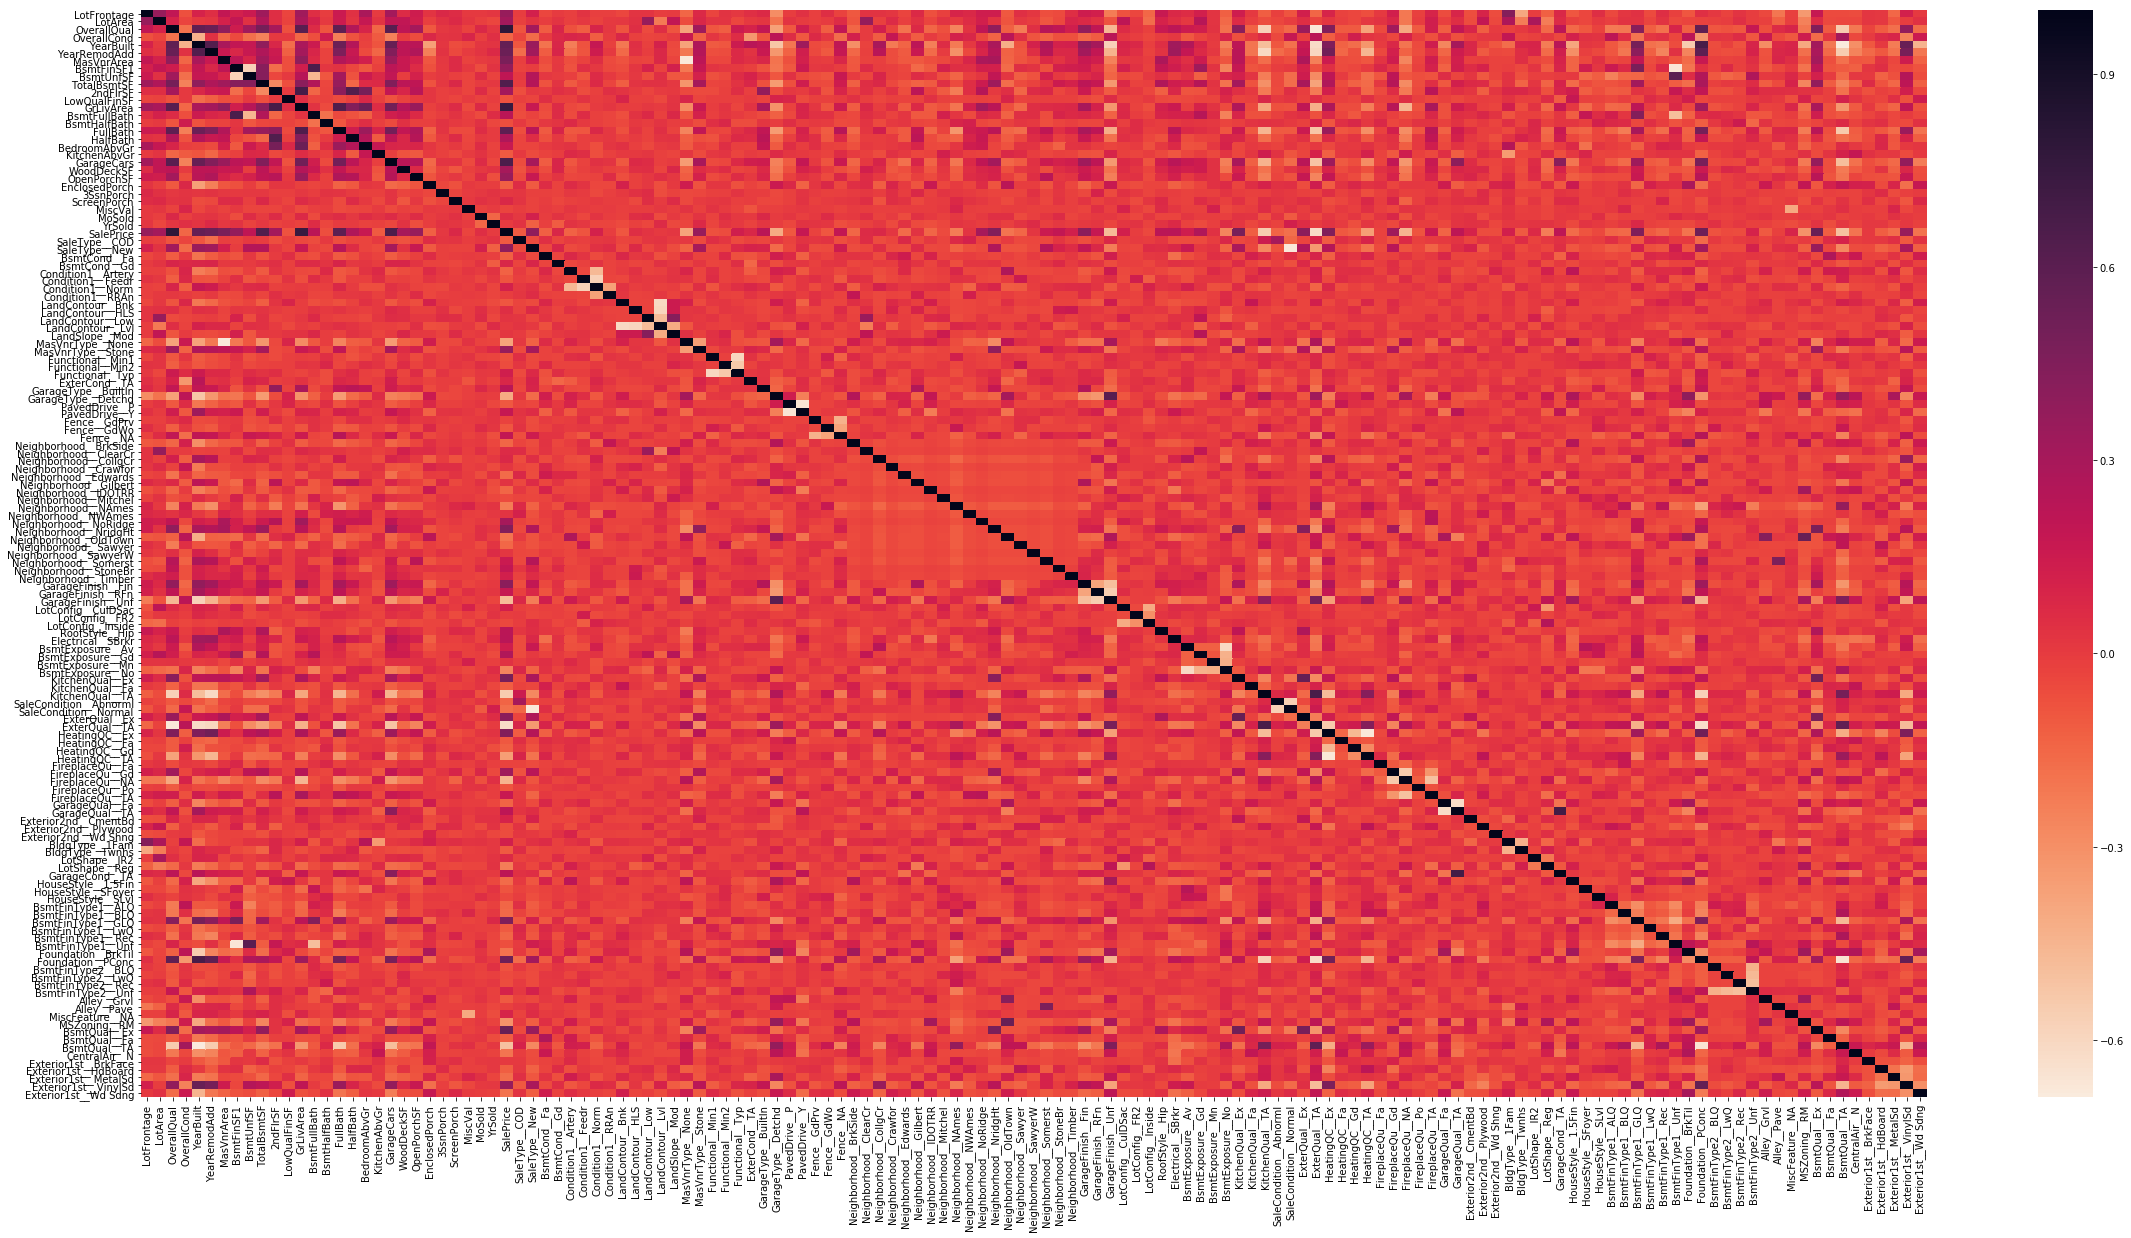

In [55]:
norm_correlation = train_data_norm[train_data_df.columns].corr()

fig, ax = plt.subplots(figsize=(40,20))
sn.heatmap(norm_correlation,xticklabels=train_data_df.columns,yticklabels=train_data_df.columns,ax=ax,cmap=sn.cm.rocket_r)

<p> We decided to watch the correlation matrix. Highly correlated features have their absolute correlation value close to 1. We can visualize them by looking for the dark and pale squares. <p/>

<div class="">
    <h3>Model Selection</h3>
</div>

Perhaps the most important segment of this challenge involves the selection of a model that can successfully handle the given data and yield sensible predictions.
Instead of focusing exclusively on your final chosen model, it is also important to share your thought process in this notebook by additionally describing alternative candidate models.
There is a wealth of models to choose from, such as <i>decision trees</i>, <i>random forests</i>, <i>(Bayesian) neural networks</i>, <i>Gaussian processes</i>, <i>LASSO regression</i>, and so on.
There are several factors which may influence your decision:

- What is the model's complexity?
- Is the model interpretable?
- Is the model capable of handling different data-types?
- Does the model return uncertainty estimates along with predictions?

An in-depth evaluation of competing models in view of this and other criteria will elevate the quality of your submission and earn you a higher grade.


<b> Dropping SalePrice : <b/>

In [56]:
PCA_C = train_data_df.columns.size - 1

In [57]:
scaler = preprocess.MinMaxScaler(copy=True)
scaler.fit(train_data_df.drop(['SalePrice'],axis=1,inplace=False))

train_data_norm = pd.DataFrame(scaler.transform(train_data_df.drop(['SalePrice'],axis=1,inplace=False)),\
                               columns=train_data_df.drop(['SalePrice'],axis=1,inplace=False).columns)
train_data_norm['SalePrice'] = train_y

In [58]:
train_x = train_data_norm.drop(['SalePrice'],axis=1)

<b> Creating training and test data : <b/>

<p> In the training set we train on the first 80% of dataset and validate on the remaining 20% dataset.</p>

In [59]:
split_index = int(len(train_x)*0.8)

train_setx = train_x[:split_index]
train_sety = train_y[:split_index]

val_setx = train_x[split_index+1:]
val_sety = train_y[split_index+1:]


<b> Some useful functions : <b/>

In [60]:
##to plot the error with the number of principal components selected
def plotError(error_list,title='R2(top) MSE(middle) RMS(bottom)',xlabel='Features'):
    plt.figure(figsize=(40,10))
    ret = {}
    
    fig,axs = plt.subplots(3,1,sharex=True,figsize=(20,10))
    
    fig.subplots_adjust(hspace=0)
    
    y = [x['R2'] for x in error_list]
    x = np.arange(1,len(error_list)+1)
    axs[0].plot(x,y,'r')
    axs[0].set_title(title)
    axs[0].set_ylabel('R2')
    axs[0].grid()
    ret['R2'] = (y.index(max(y))+1,max(y))
    
    y = [x['MSE'] for x in error_list]
    x = np.arange(1,len(error_list)+1)
    axs[1].plot(x,y,'g')
    axs[1].set_ylabel('MSE')
    axs[1].grid()
    ret['MSE'] = (y.index(min(y))+1,min(y))
    
    y = [x['RMS'] for x in error_list]
    x = np.arange(1,len(error_list)+1)
    axs[2].plot(x,y,'b')
    axs[2].set_xticks(x)
    axs[2].set_xlabel(xlabel)
    axs[2].set_ylabel('RMS')
    axs[2].grid()
    ret['RMS'] = (y.index(min(y))+1,min(y))
    
    plt.show()
    
    return ret

In [61]:
#MEthod to perform PCA on any given esitmator
def PCA_regression(components= PCA_C,estimater = lm.LinearRegression(),y_scale=y_scaler):
    steps = [
        ('pca', decom.PCA()),
        ('estimator', estimater)
    ]
    pipe = pl.Pipeline(steps)
    pca = pipe.set_params(pca__n_components=components)
    train_y_normalized = y_scale.transform(train_sety.values.reshape([-1,1]))
    PCR = pca.fit(train_setx, train_y_normalized)
    PCR_y_normalized = PCR.predict(val_setx)
    PCR_y = y_scale.inverse_transform(PCR_y_normalized.reshape([-1,1]))
    return PCR_y

In [62]:
def calculateErrors(y_pred, y_true = val_sety):
    errors= {}
    errors['MSE'] = met.mean_squared_error(np.log(y_pred),np.log(y_true))
    errors['R2'] = met.r2_score(y_pred,y_true)
    errors['RMS'] = np.sqrt(errors['MSE'])
    return errors

<h4> Model Testing</h4>
<p> for the most part, we use scikit-learn for regression and only in the case of Neural Networks we used TensorFlow as that was a tool that we knew how to use. Moreover, for all the regression methods, the results obtained are normalized which then need to be de normalized.</p>

<b> Gradient Boosting and AdaBoost Regressors <b/>

In [63]:
train_sety_normalized = y_scaler.transform(train_sety.values.reshape([-1,1]))

In [64]:
val_setx.shape,train_setx.shape

((215, 138), (864, 138))

In [65]:
GBR = ensem.GradientBoostingRegressor(loss='lad',learning_rate=0.01,n_estimators=1000).fit(train_setx,train_sety_normalized)
GBR_y_norm = GBR.predict(val_setx)
GBR_y = y_scaler.inverse_transform(GBR_y_norm.reshape([-1,1]))

print(calculateErrors(GBR_y))

{'R2': 0.8447643431164451, 'RMS': 0.11535032854171957, 'MSE': 0.013305698294682646}


In [66]:
AB = ensem.AdaBoostRegressor(loss='square',learning_rate=0.01,n_estimators=1000).fit(train_setx,train_sety_normalized)
AB_y_norm = AB.predict(val_setx)
AB_y = y_scaler.inverse_transform(AB_y_norm.reshape([-1,1]))

print(calculateErrors(AB_y))

{'R2': 0.6997704060879235, 'RMS': 0.1810891286808448, 'MSE': 0.03279327252638757}


<b> Ridge ( + PCA) <b/>

In [67]:
RR =lm.Ridge(alpha=3.0).fit(train_setx,train_sety_normalized)
RR_y_norm = RR.predict(val_setx)
RR_y = y_scaler.inverse_transform(RR_y_norm)
print(calculateErrors(RR_y))

{'R2': 0.8932412710746095, 'RMS': 0.11046653318427269, 'MSE': 0.012202854953752017}


<Figure size 2880x720 with 0 Axes>

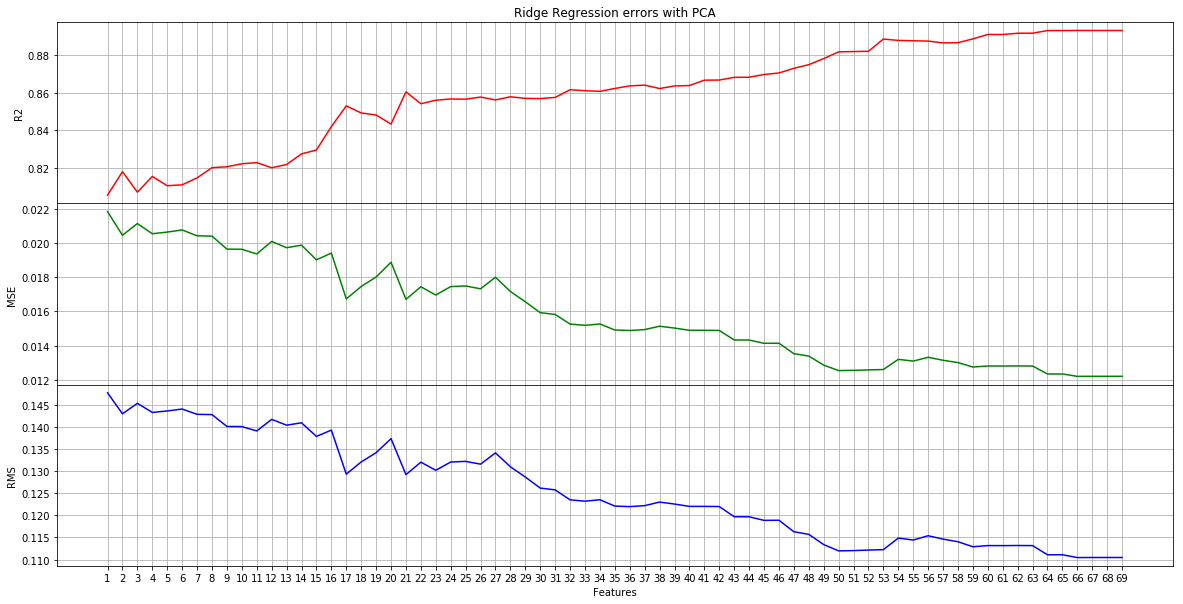

{'R2': (66, 0.8932599540289876), 'RMS': (66, 0.11045007446747439), 'MSE': (66, 0.012199218949870637)}


In [68]:
PCA_Ridge_errors = []
for i in np.arange(PCA_C//2,PCA_C):
    PCR_Ridge_y = PCA_regression(components=i,estimater=lm.Ridge(alpha=3.0))
    PCA_Ridge_errors.append(calculateErrors(PCR_Ridge_y))

PCA_Ridge_feats = plotError(PCA_Ridge_errors,title='Ridge Regression errors with PCA')
print(PCA_Ridge_feats)

<b> Bayesian Ridge ( + PCA) <b/>

In [69]:
BR = lm.BayesianRidge(alpha_1=3.0).fit(train_setx,train_sety_normalized)
BR_y_norm = BR.predict(val_setx)
BR_y = y_scaler.inverse_transform(BR_y_norm.reshape([-1,1]))
print(calculateErrors(BR_y))

{'R2': 0.9025508938511936, 'RMS': 0.11624566691370043, 'MSE': 0.013513055076210988}


<Figure size 2880x720 with 0 Axes>

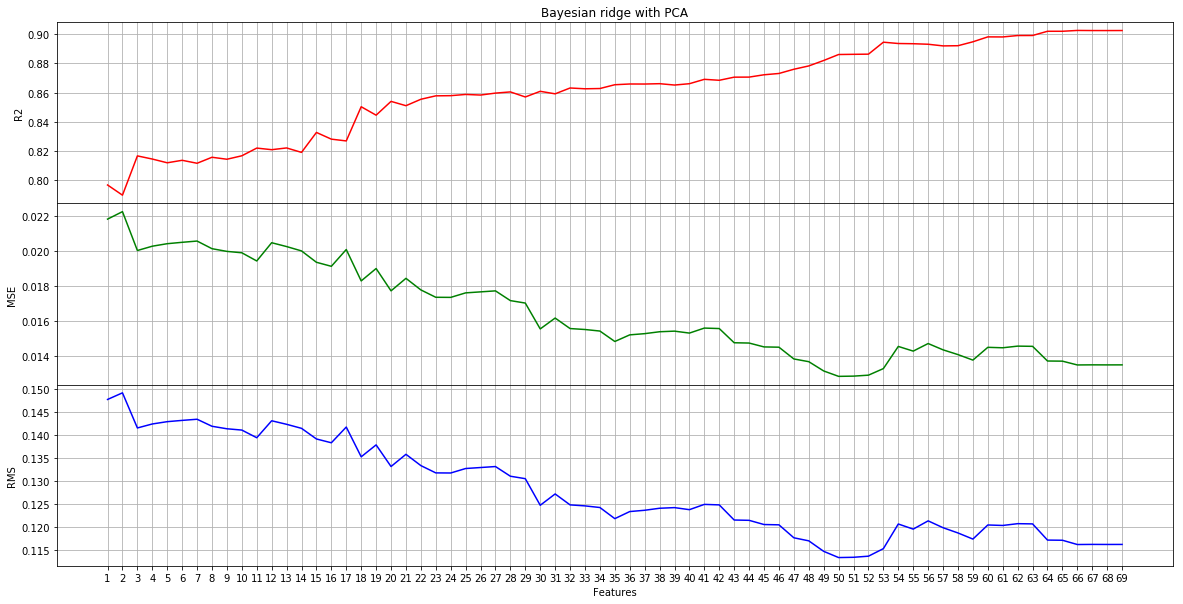

{'R2': (66, 0.9026216697243441), 'RMS': (50, 0.11340716315401592), 'MSE': (50, 0.012861184654641585)}


In [70]:
PCA_BRidge_errors = []
for i in np.arange(PCA_C//2,PCA_C):
    PCR_BRidge_y = PCA_regression(components=i,estimater=lm.BayesianRidge(alpha_1=3.0))
    PCA_BRidge_errors.append(calculateErrors(PCR_BRidge_y))

PCA_BRidge_feats = plotError(PCA_BRidge_errors,title='Bayesian ridge with PCA')
print(PCA_BRidge_feats)

<b> Random Forest Regression ( + PCA) <b/>

In [71]:
RF = ensem.RandomForestRegressor(criterion='mse').fit(train_setx,train_sety)
RF_y = RF.predict(val_setx)

print(calculateErrors(RF_y))

{'R2': 0.7982099271276029, 'RMS': 0.13579831960681227, 'MSE': 0.018441183608033932}


<Figure size 2880x720 with 0 Axes>

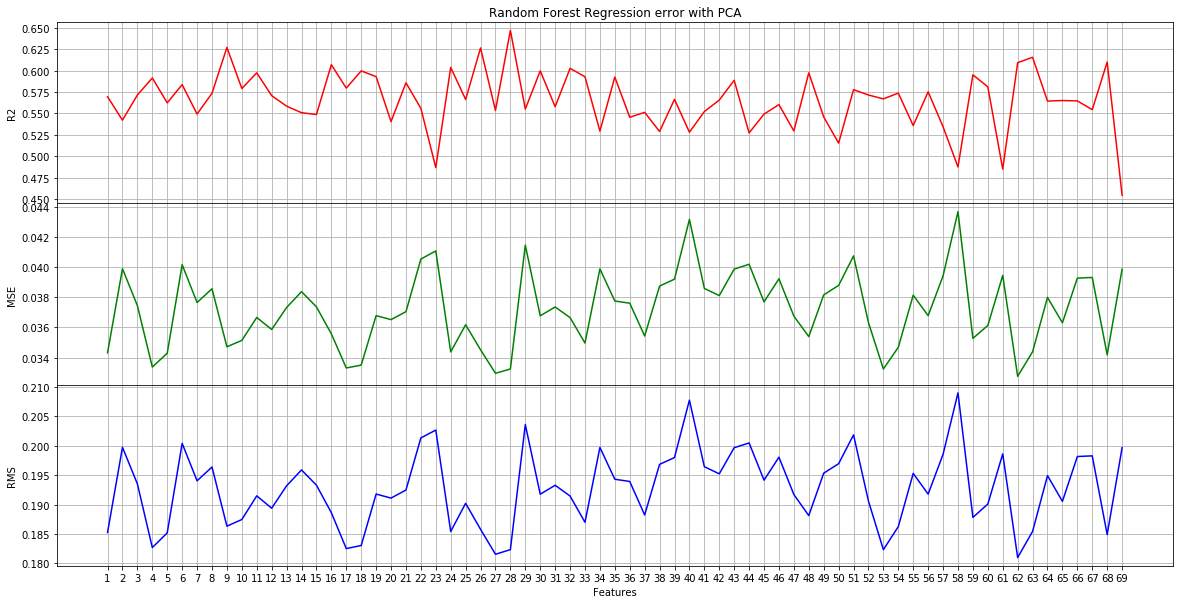

{'R2': (28, 0.6469519778494556), 'RMS': (62, 0.1809994289245573), 'MSE': (62, 0.03276079327101587)}


In [72]:
PCA_RF_errors = []
for i in np.arange(PCA_C//2,PCA_C):
    PCR_RF_y = PCA_regression(components=i,estimater=ensem.RandomForestRegressor(criterion='mse'))
    PCA_RF_errors.append(calculateErrors(PCR_RF_y))

PCA_RF_feats = plotError(PCA_RF_errors,title='Random Forest Regression error with PCA')
print(PCA_RF_feats)

<b> Decision Tree Regression <b/>

In [73]:
DT = tree.DecisionTreeRegressor(criterion='mse').fit(train_setx,train_sety)
DT_y = DT.predict(val_setx)

print(calculateErrors(DT_y))

{'R2': 0.7252861668503372, 'RMS': 0.18497207715661912, 'MSE': 0.034214669327634256}


<Figure size 2880x720 with 0 Axes>

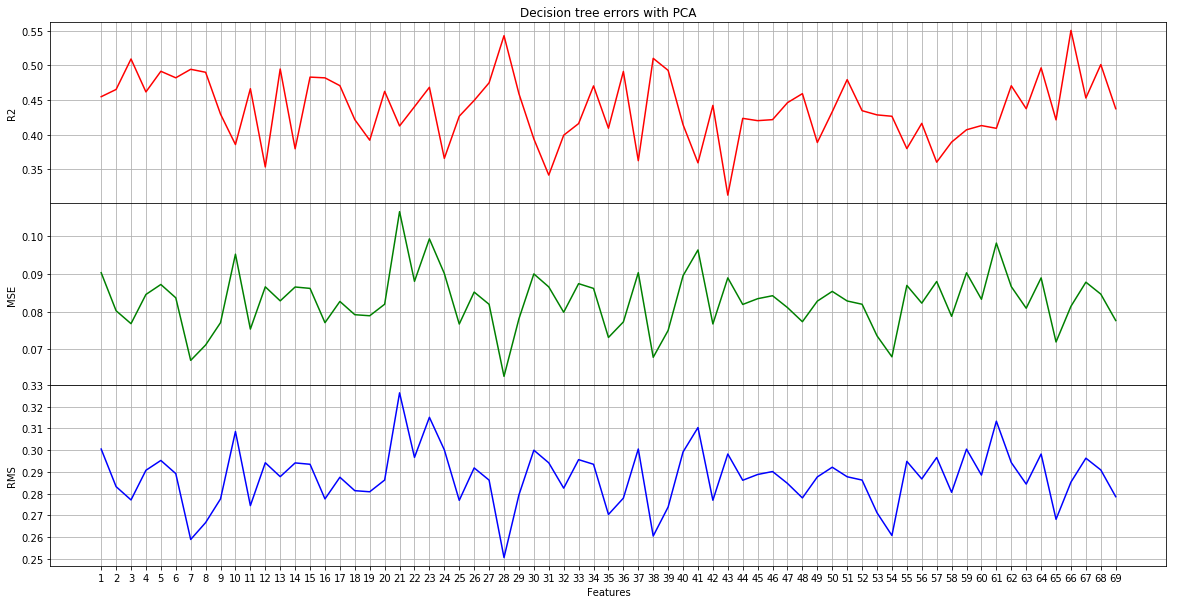

{'R2': (66, 0.5506346115872647), 'RMS': (28, 0.2506001368419512), 'MSE': (28, 0.06280042858520468)}


In [74]:
PCA_DT_errors = []
for i in np.arange(PCA_C//2,PCA_C):
    PCR_DT_y = PCA_regression(components=i,estimater=tree.DecisionTreeRegressor(criterion='mae'))
    PCA_DT_errors.append(calculateErrors(PCR_DT_y))

PCA_DT_feats = plotError(PCA_DT_errors,title='Decision tree errors with PCA')
print(PCA_DT_feats)

<b> Extra Tree Regression <b/>

In [75]:
ET = tree.ExtraTreeRegressor(criterion='mae',splitter='random').fit(train_setx,train_sety)
ET_y = ET.predict(val_setx)

print(calculateErrors(ET_y))

{'R2': 0.5386707818968126, 'RMS': 0.22198257635588436, 'MSE': 0.04927626420559603}


<Figure size 2880x720 with 0 Axes>

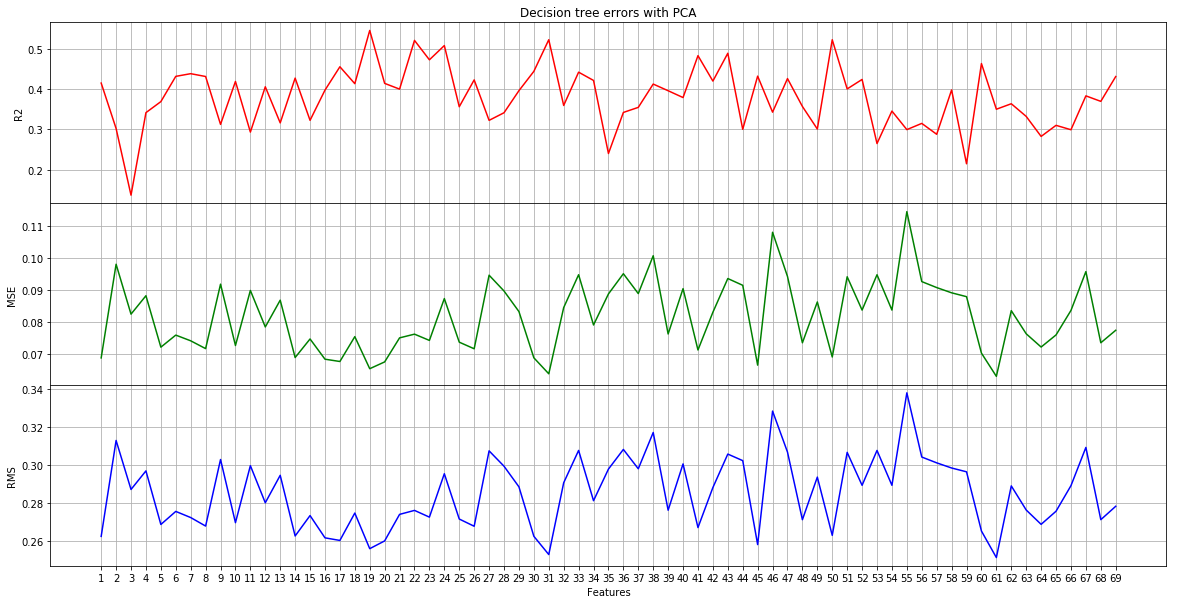

{'R2': (19, 0.5468525145871996), 'RMS': (61, 0.25135967559303024), 'MSE': (61, 0.0631816865142334)}


In [76]:
PCA_ET_errors = []
for i in np.arange(PCA_C//2,PCA_C):
    PCR_ET_y = PCA_regression(components=i,estimater=tree.ExtraTreeRegressor(criterion='mae',splitter='random'))
    PCA_ET_errors.append(calculateErrors(PCR_ET_y))

PCA_ET_feats = plotError(PCA_ET_errors,title='Decision tree errors with PCA')
print(PCA_ET_feats)

<b> GD Regression <b/>

In [77]:
GD_Best = None
RMS_Best = 200
for i in range(100):
    GD = lm.SGDRegressor(loss='squared_loss',max_iter=1000,tol=np.power(0.1,17)).fit(train_setx,train_sety)
    GD_y = GD.predict(val_setx)
    
    if(calculateErrors(GD_y)['RMS'] < RMS_Best):
        GD_Best = GD
        RMS_Best = calculateErrors(GD_y)['RMS']

GD_y = GD_Best.predict(val_setx)
print(calculateErrors(GD_y))

{'R2': 0.863525304898914, 'RMS': 0.11652190429211237, 'MSE': 0.013577354179860196}


<Figure size 2880x720 with 0 Axes>

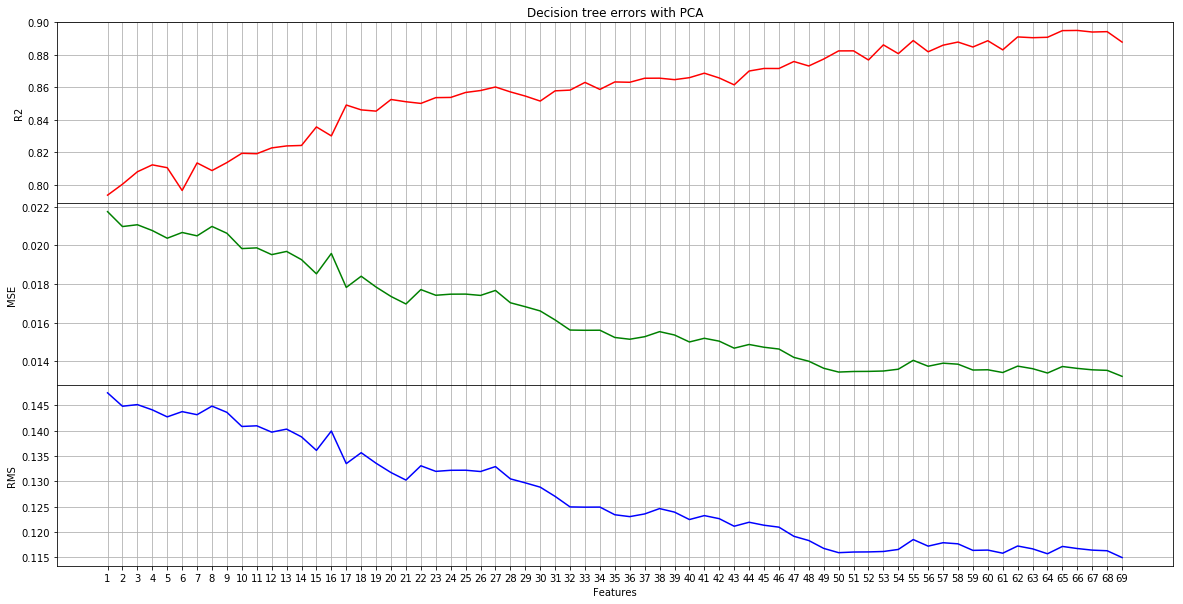

{'R2': (66, 0.8949845568838939), 'RMS': (69, 0.11497117844390692), 'MSE': (69, 0.013218371872780686)}


In [78]:
PCA_GD_errors = []
for i in np.arange(PCA_C//2,PCA_C):
    PCR_GD_y = PCA_regression(components=i,estimater=lm.SGDRegressor(loss='squared_loss',max_iter=5000,tol=np.power(0.1,14)))
    PCA_GD_errors.append(calculateErrors(PCR_GD_y))

PCA_GD_feats = plotError(PCA_GD_errors,title='Decision tree errors with PCA')
print(PCA_GD_feats)

<b> SVR Regression <b/>

In [79]:
SVR = svm.SVR(degree=4).fit(train_setx,train_sety)
SVR_y = SVR.predict(val_setx)

print(calculateErrors(SVR_y))

{'R2': -27197937.547388975, 'RMS': 0.35222798726430976, 'MSE': 0.12406455501226675}


<Figure size 2880x720 with 0 Axes>

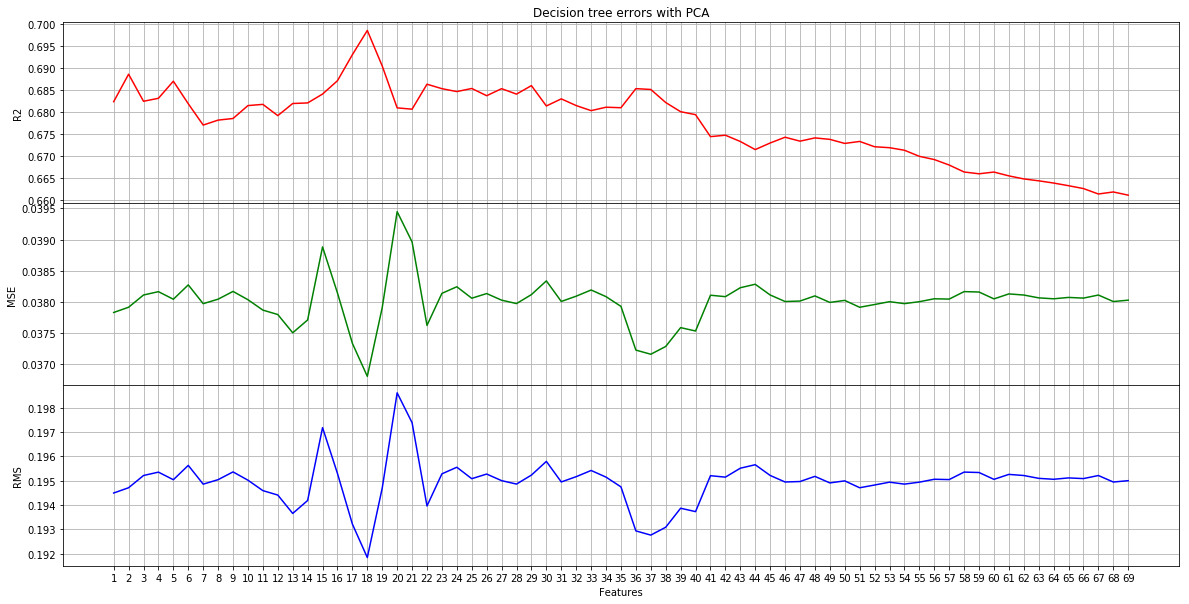

{'R2': (18, 0.6985784331786107), 'RMS': (18, 0.19184217161475078), 'MSE': (18, 0.03680341880986349)}


In [80]:
PCA_SVR_errors = []
for i in np.arange(PCA_C//2,PCA_C):
    PCR_SVR_y = PCA_regression(components=i,estimater=svm.SVR(degree=4))
    PCA_SVR_errors.append(calculateErrors(PCR_SVR_y))

lin_feats = plotError(PCA_SVR_errors,title='Decision tree errors with PCA')
print(lin_feats)

<b> Using Neural Networks <b/>

In [81]:
## plots the results
def PLOT(title,cost_vect,cost_vect_test):
    iters = len(cost_vect)
    plt.figure()
    plt.title(title )
    plt.xlabel('iteration number')
    plt.ylabel(title)
    plt.plot(np.linspace(0,iters-1,num=iters),cost_vect)
    plt.plot(np.linspace(0,iters-1,num=iters),cost_vect_test)
    plt.legend(['Train','Validation'])
    plt.show()

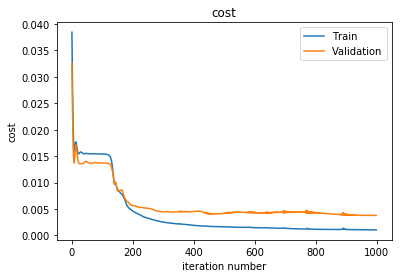

{'R2': 0.7421333162551932, 'RMS': 0.1983658476813847, 'MSE': 0.03934900952635432}


In [82]:
INPUT_SIZE = train_setx.shape[1]
#All 3s with 2000 iteration and gradient 0.01
HIDDEN_LAYERS =[3,2,2,2,2,2,2]#[3,2,3,3,2,2] with 1500#[3,2,2,2,3] 2100 #[3,2,3,3,3] 2100 iterations
OUTPUT_SIZE=1
GRADIENT = 0.01
ITERATIONS = 1000
RAND_SEED=42


x1 = tf.placeholder(tf.float32,shape = (None,INPUT_SIZE), name = "input")
y1 = tf.placeholder(tf.float32,shape = (None,OUTPUT_SIZE) , name = "classes")

# layer 1 tensors
w1 = tf.Variable(tf.random_normal(shape =[INPUT_SIZE,HIDDEN_LAYERS[0]], dtype =tf.float32 ,seed=RAND_SEED))
b1 = tf.Variable(tf.constant(0.1,shape=[HIDDEN_LAYERS[0]]))

layer1 = tf.matmul(x1,w1) + b1
layer1 = tf.nn.tanh(layer1)

# layer 2 tensors
w2 = tf.Variable(tf.random_normal(shape =[HIDDEN_LAYERS[0],HIDDEN_LAYERS[1]], dtype =tf.float32,seed=RAND_SEED ))
b2 = tf.Variable(tf.constant(0.1,shape=[HIDDEN_LAYERS[1]]))

layer2 = tf.matmul(layer1,w2) + b2
layer2 = tf.nn.tanh(layer2)

# layer 3 tensors
w3 = tf.Variable(tf.random_normal(shape =[HIDDEN_LAYERS[1],HIDDEN_LAYERS[2]], dtype =tf.float32,seed=RAND_SEED ))
b3 = tf.Variable(tf.constant(0.1,shape=[HIDDEN_LAYERS[2]]))

layer3 = tf.matmul(layer2,w3) + b3
layer3 = tf.nn.tanh(layer3)

# layer 4 tensors 
w4 = tf.Variable(tf.random_normal(shape =[HIDDEN_LAYERS[2],HIDDEN_LAYERS[3]], dtype =tf.float32,seed=RAND_SEED ))
b4 = tf.Variable(tf.constant(0.1,shape=[HIDDEN_LAYERS[3]]))

layer4 = tf.matmul(layer3,w4) + b4
layer4 = tf.nn.tanh(layer4)

# layer 5 tensors 
w5 = tf.Variable(tf.random_normal(shape =[HIDDEN_LAYERS[3],HIDDEN_LAYERS[4]], dtype =tf.float32,seed=RAND_SEED ))
b5 = tf.Variable(tf.constant(0.1,shape=[HIDDEN_LAYERS[4]]))

layer5 = tf.matmul(layer4,w5) + b5
layer5 = tf.nn.tanh(layer5)

# layer 6 tensors 
w6 = tf.Variable(tf.random_normal(shape =[HIDDEN_LAYERS[4],HIDDEN_LAYERS[5]], dtype =tf.float32,seed=RAND_SEED ))
b6 = tf.Variable(tf.constant(0.1,shape=[HIDDEN_LAYERS[5]]))

layer6 = tf.matmul(layer5,w6) + b6
layer6 = tf.nn.tanh(layer6)

# layer 7 tensors 
w7 = tf.Variable(tf.random_normal(shape =[HIDDEN_LAYERS[5],HIDDEN_LAYERS[6]], dtype =tf.float32,seed=RAND_SEED ))
b7 = tf.Variable(tf.constant(0.1,shape=[HIDDEN_LAYERS[6]]))

layer7 = tf.matmul(layer6,w7) + b7
layer7 = tf.nn.tanh(layer7)

# layer 8 tensors -- output tensors
w8 = tf.Variable(tf.random_normal(shape =[HIDDEN_LAYERS[6],OUTPUT_SIZE], dtype =tf.float32,seed=RAND_SEED ))
b8 = tf.Variable(tf.constant(0.1,shape=[OUTPUT_SIZE]))

y_predicted = tf.matmul(layer7,w8) + b8

# cost function calculated using absolute difference cost function
cost = tf.losses.mean_squared_error(labels=y1,predictions=y_predicted)

## Adam optimizer for optimization
Optimized = tf.train.AdamOptimizer(GRADIENT).minimize(cost)

sess = tf.InteractiveSession()

# intialization of variables
sess.run(tf.global_variables_initializer())
cost_vect = np.zeros([ITERATIONS])
cost_vect_test = np.zeros([ITERATIONS])

NN_train_x = train_setx
NN_train_y = y_scaler.transform(train_sety.values.reshape([-1,1]))

NN_val_x = val_setx
NN_val_y = y_scaler.transform(val_sety.values.reshape([-1,1]))
## the algorithm is iterated and trained on the training set and the results
## are calculated
for i in np.arange(ITERATIONS):
    feed = {x1 : NN_train_x, y1:NN_train_y }
    val_feed = {x1 : NN_val_x, y1:NN_val_y}
    sess.run(Optimized,feed_dict=feed)
    cost_vect[i] = cost.eval(feed_dict =feed,session = sess)
    cost_vect_test[i] = cost.eval(feed_dict =val_feed,session = sess)
#     if(i%100 == 0):
#         print("Turn: %d\n\tCost: %f" % (i,cost_vect[i]))

PLOT('cost',cost_vect,cost_vect_test)
NN_y_scaled = y_predicted.eval(feed_dict = val_feed)

NN_y = y_scaler.inverse_transform(NN_y_scaled)

print(calculateErrors(NN_y))

sess.close()

<div class="">
    <h3>Model Selected</h3>
</div>

<p>We decided to select GradientBoostRegressor after observing the Root Mean Square and R2 score. There were other methods which gave better score on this result but after multiple trials, GradientBoostRegressor gave the most stable results and we decided to choose it. </p>

In [99]:
## The parameters chosen for GradientBoost were 10,000 estimators and a learning rate of 0.01 
##(same as in the model selection phase)
train_y_normalized = y_scaler.transform(train_y.values.reshape([-1,1]))
GBR = ensem.GradientBoostingRegressor(loss='lad',learning_rate=0.01,n_estimators=10000).fit(train_x,train_y_normalized)
GBR_y_norm = GBR.predict(test_data_df)
GBR_y = y_scaler.inverse_transform(GBR_y_norm.reshape([-1,1]))

In [100]:
Results = pd.DataFrame(GBR_y,columns=['SalePrice'])
Results['Id'] = initial_test_data['Id']
Results = Results[['Id','SalePrice']]
Results.to_csv('./results.csv',header=True,index=False)